In [1]:
# import sys
# !{sys.executable} -m pip install --upgrade c-lasso 
from classo import random_data, classo_problem, to_zarr

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this is the path of the directory where one want to save its figures
path = '../../figures/'

## Basic example

The c-lasso package includes
the routine ```random_data``` that allows you to generate problem instances using normally distributed data.

In [3]:
m, d, d_nonzero, k, sigma = 100, 200, 5, 1, 0.5
(X, C, y), sol = random_data(m, d, d_nonzero, k, sigma, zerosum = True,seed = 1)
np.nonzero(sol)

(array([  7,  63, 148, 164, 168]),)

This code snippet generates a problem instance with sparse β in dimension d = 100 (sparsity d_nonzero = 5). The design matrix X comprises n = 100 samples generated from an i.i.d standard normal distribution. The dimension of the constraint matrix C is d x k matrix. The noise level is σ = 0.5. The input zerosum = True implies that C is the all-ones vector and Cβ = 0. The n-dimensional outcome vector y and the regression vector β is then generated to satisfy the given constraints.

Next we can define a default c-lasso problem instance with the generated data:

In [4]:
problem = classo_problem(X, y)

You can look at the generated problem instance by typing:

In [5]:
print(problem)

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Stability selection
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : not specified
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



You can solve the corresponding c-lasso problem instance using

In [6]:
problem.solve()

One can add this code snippet to specify the location to save the figures

In [7]:
problem.solution.StabSel.save1 = path + 'basic/StabSel'
problem.solution.StabSel.save2 = path + 'basic/beta'

After completion, the results of the optimization and model selection routines 
can be visualized.

The command shows the running time(s) for the c-lasso problem instance, and the selected variables for sability selection.

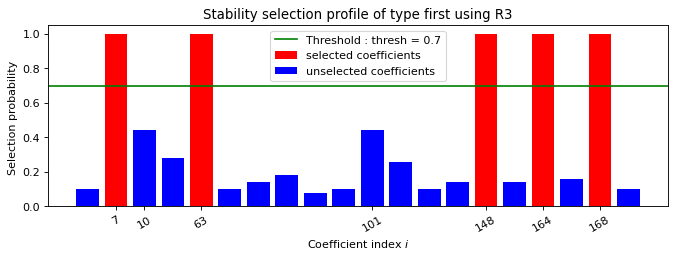

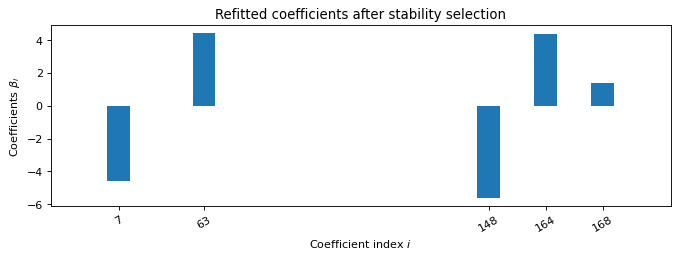


 STABILITY SELECTION : 
   Selected variables :  7    63    148    164    168    
   Running time :  1.546s



In [8]:
print(problem.solution)

## Advanced example 

In the next example, we show how one can specify different aspects of the problem 
formulation and model selection strategy.

In [9]:
m,  d,  d_nonzero,  k, sigma = 100, 200, 5, 0, 0.5
(X, C, y), sol = random_data(m, d, d_nonzero, k, sigma, zerosum = True, seed = 4)
problem                                     = classo_problem(X, y, C)
problem.formulation.huber                   = True
problem.formulation.concomitant             = False
problem.model_selection.CV                  = True
problem.model_selection.LAMfixed            = True
problem.model_selection.PATH                = True
problem.model_selection.StabSelparameters.method = 'max'
problem.model_selection.CVparameters.seed = 1
problem.model_selection.LAMfixedparameters.rescaled_lam = True
problem.model_selection.LAMfixedparameters.lam = .1

In [10]:
problem.solve()
print(problem)

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.09
     lam = 0.1
     theoretical_lam = 0.224
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 80
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : max
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



In [11]:
problem.solution.StabSel.save1 = path + 'advanced/StabSel'
problem.solution.StabSel.save2 = path + 'advanced/StabSel-beta'
problem.solution.CV.save1 = path + 'advanced/CV'
problem.solution.CV.save2 = path + 'advanced/CVbeta'
problem.solution.LAMfixed.save = path + 'advanced/beta'
problem.solution.PATH.save = path + 'advanced/'

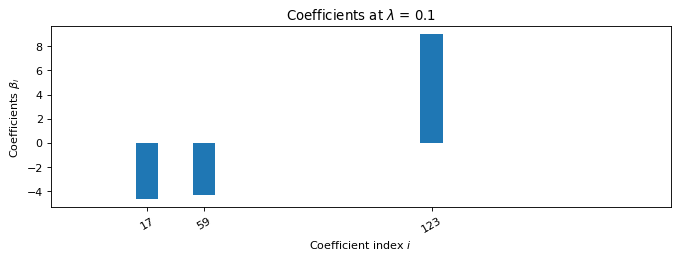

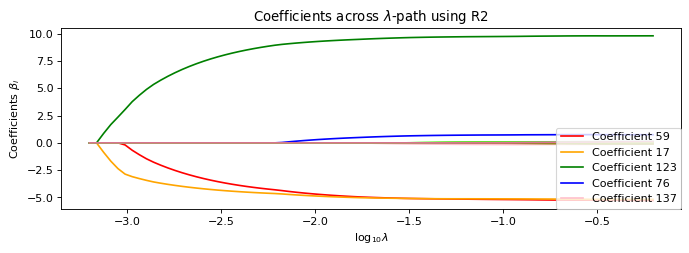

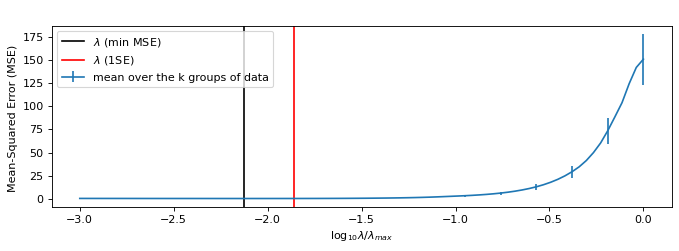

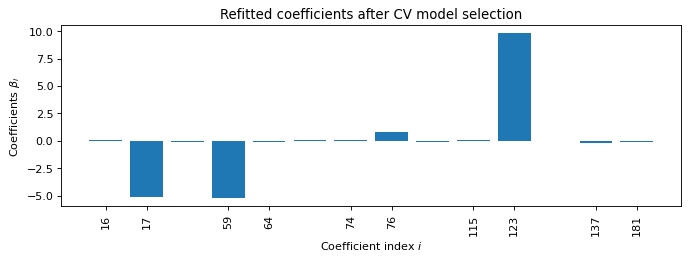

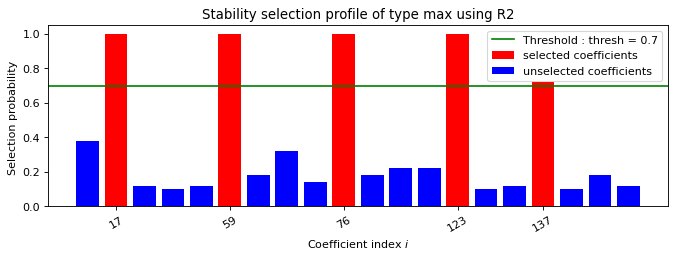

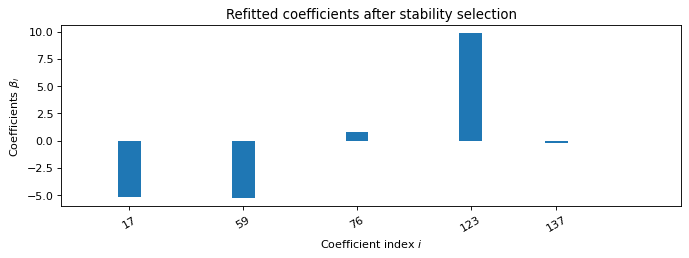


 LAMBDA FIXED : 
   Selected variables :  17    59    123    
   Running time :  0.104s

 PATH COMPUTATION : 
   Running time :  0.638s

 CROSS VALIDATION : 
   Selected variables :  16    17    57    59    64    73    74    76    93    115    123    134    137    181    
   Running time :  2.1s

 STABILITY SELECTION : 
   Selected variables :  17    59    76    123    137    
   Running time :  6.062s



In [12]:
print(problem.solution)

## Zarr storage

In [13]:
import zarr
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

ImportError: No module named 'ipytree': Run `pip install zarr[jupyter]` or `conda install ipytree`to get the required ipytree dependency for displaying the tree widget. If using jupyterlab, you also need to run `jupyter labextension install ipytree`

/
 ├── data
 │   ├── C (1, 200) float64
 │   ├── X (100, 200) float64
 │   ├── label (200,) <U3
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   │   ├── formulation
 │   │   └── lambdas (80,) float64
 │   ├── LAMfixedparameters
 │   │   └── formulation
 │   ├── PATHparameters
 │   │   ├── formulation
 │   │   └── lambdas (80,) float64
 │   └── StabSelparameters
 │       └── formulation
 └── solution
     ├── CV
     │   ├── beta (200,) float64
     │   ├── formulation
     │   ├── label (200,) <U3
     │   ├── refit (200,) float64
     │   ├── selected_param (200,) bool
     │   ├── standard_error (80,) float64
     │   ├── xGraph (80,) float64
     │   └── yGraph (80,) float64
     ├── LAMfixed
     │   ├── beta (200,) float64
     │   ├── formulation
     │   ├── label (200,) <U3
     │   ├── refit (200,) float64
     │   └── selected_param (200,) bool
     ├── PATH
     │   ├── BETAS (80, 200) float64
     │   ├── LAMBDAS (80,) float64
     